#Portfolio Assets Allocation Optimization

# Function/Background

In [114]:
#!pip install yfinance

In [115]:
import pandas as pd
import yfinance as yf

In [116]:
def fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include):
  Stock = yf.download(columns_of_firms, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Adj Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Filter only 'Adj Close' columns
  adj_close_columns = [col for col in Stock.columns if 'Close' in col]
  Stock_adj_close = Stock[adj_close_columns]

# Clean column names
  Stock_adj_close.columns = [col[1] for col in Stock_adj_close.columns]
  Stock = Stock_adj_close.reset_index()
  Stock = Stock.fillna("")
  Stock.iloc[:, 1:] = Stock.iloc[:, 1:].pct_change()
  Stock = Stock.dropna()
  Stock["Date"] = pd.to_datetime(Stock["Date"])
  return Stock

# Basic Data Input

In [117]:
columns_of_firms = ["XOM" ,"SHEL", "TTE", "BP", "CVX", "MPC", "PSX", "VLO", "E", "COP"]
columns_of_factors = ["VTI","SIZE",	"VLUE",	"MTUM",	"QUAL",	"USMV",	"DGRO"]

In [118]:
Enddate = "2024-04-30"
Enddate = pd.to_datetime(Enddate)
Months_to_include = 60

# Data Collection and Organization

In [119]:
Stock = fetch_data_from_yahoo(columns_of_firms, Enddate, Months_to_include)
Stock.index = Stock['Date'].values
Stock = Stock.drop(columns=['Date'])
Stock.head()

[*********************100%%**********************]  10 of 10 completed


,BP,COP,CVX,E,MPC,PSX,SHEL,TTE,VLO,XOM
2019-05-01,-0.068831,-0.065906,-0.051724,-0.116711,-0.244455,-0.142887,-0.027074,-0.074906,-0.223472,-0.118460
2019-06-01,0.024067,0.034600,0.093017,0.102102,0.215047,0.157673,0.052742,0.083301,0.216051,0.082803
2019-07-01,-0.047002,-0.031475,-0.010688,-0.052074,0.009127,0.096429,-0.033502,-0.072594,-0.004205,-0.029623
2019-08-01,-0.070206,-0.116791,-0.043782,-0.035452,-0.127328,-0.038319,-0.115917,-0.035176,-0.116950,-0.079075
2019-09-01,0.028146,0.091989,0.007475,0.009603,0.234505,0.038224,0.058453,0.041667,0.132306,0.031104


In [120]:
Factor = fetch_data_from_yahoo(columns_of_factors, Enddate, Months_to_include)
Factor.index = Factor['Date'].values
Factor = Factor.drop(columns=['Date'])
Factor.head()

[*********************100%%**********************]  7 of 7 completed


,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
2019-05-01,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016,-0.064499
2019-06-01,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.066814
2019-07-01,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.014125
2019-08-01,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.020827
2019-09-01,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.013151


In [121]:
Stock = Stock.merge(Factor, left_index=True, right_index=True)
Stock.head()

,BP,COP,CVX,E,MPC,PSX,SHEL,TTE,VLO,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
2019-05-01,-0.068831,-0.065906,-0.051724,-0.116711,-0.244455,-0.142887,-0.027074,-0.074906,-0.223472,-0.118460,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016,-0.064499
2019-06-01,0.024067,0.034600,0.093017,0.102102,0.215047,0.157673,0.052742,0.083301,0.216051,0.082803,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.066814
2019-07-01,-0.047002,-0.031475,-0.010688,-0.052074,0.009127,0.096429,-0.033502,-0.072594,-0.004205,-0.029623,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.014125
2019-08-01,-0.070206,-0.116791,-0.043782,-0.035452,-0.127328,-0.038319,-0.115917,-0.035176,-0.116950,-0.079075,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.020827
2019-09-01,0.028146,0.091989,0.007475,0.009603,0.234505,0.038224,0.058453,0.041667,0.132306,0.031104,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.013151


In [122]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
# Fetch data
Index = yf.download(Index, start=Enddate - pd.DateOffset(months=Months_to_include+1), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Index.columns if 'Adj Close' in col]
Index_adj_close = Index[adj_close_columns]
# Clean column names
Index_adj_close.columns = [col[1] for col in Index_adj_close.columns]
Index = Index_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  3 of 3 completed


Column names cleaned and DataFrame reset.


In [123]:
Index = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500
Index = fetch_data_from_yahoo(Index, Enddate, Months_to_include)
Index = Index.rename(columns = {"^IXIC": "NASDAQ", "^DJI":"Dow Jones", "^GSPC":"S&P 500"})
Index.head()

[*********************100%%**********************]  3 of 3 completed


,Date,Dow Jones,S&P 500,NASDAQ
1,2019-05-01,-0.066855,-0.065778,-0.079334
2,2019-06-01,0.071929,0.068930,0.074209
3,2019-07-01,0.009936,0.013128,0.021131
4,2019-08-01,-0.017160,-0.018092,-0.025997
5,2019-09-01,0.019450,0.017181,0.004579


In [124]:
Stock['Index'] = Index['S&P 500'].values

In [125]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
risk_free = ["^IRX", "^FVX", "^TNX", "^TYX"]  # 6-month T-bill, 5-year, 10-year, 30-year
# Fetch data
Risk_Free_Rate = yf.download(risk_free, start=Enddate - pd.DateOffset(months=Months_to_include), end=Enddate, interval="1mo")
# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Risk_Free_Rate.columns if 'Adj Close' in col]
Risk_Free_Rate_adj_close = Risk_Free_Rate[adj_close_columns]
# Clean column names
Risk_Free_Rate_adj_close.columns = [col[1] for col in Risk_Free_Rate_adj_close.columns]
Risk_Free_Rate = Risk_Free_Rate_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  4 of 4 completed


Column names cleaned and DataFrame reset.


In [126]:
Risk_Free_Rate = Risk_Free_Rate.rename(columns = {"^IRX": "TB13W", "^FVX": "TB5", "^TNX": "TB10", "^TYX": "TB30"})
Risk_Free_Rate["Date"] = pd.to_datetime(Risk_Free_Rate["Date"])
Risk_Free_Rate.iloc[:, 1:] = Risk_Free_Rate.iloc[:, 1:]/100
Risk_Free_Rate = Risk_Free_Rate[['Date', 'TB13W', 'TB5', 'TB10', 'TB30']]
Risk_Free_Rate.tail()

,Date,TB13W,TB5,TB10,TB30
55,2023-12-01,0.05180,0.03840,0.03866,0.04019
56,2024-01-01,0.05188,0.03882,0.03967,0.04215
57,2024-02-01,0.05223,0.04262,0.04252,0.04375
58,2024-03-01,0.05203,0.04220,0.04206,0.04349
59,2024-04-01,0.05245,0.04723,0.04686,0.04790


In [127]:
Stock['Risk_Free_Rate'] = Risk_Free_Rate['TB13W'].values/12
Stock.head()

,BP,COP,CVX,E,MPC,PSX,SHEL,TTE,VLO,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
2019-05-01,-0.068831,-0.065906,-0.051724,-0.116711,-0.244455,-0.142887,-0.027074,-0.074906,-0.223472,-0.118460,-0.057697,-0.021968,-0.065825,-0.069184,-0.016145,-0.096016,-0.064499,-0.065778,0.001911
2019-06-01,0.024067,0.034600,0.093017,0.102102,0.215047,0.157673,0.052742,0.083301,0.216051,0.082803,0.063178,0.057135,0.065339,0.070211,0.044324,0.087463,0.066814,0.068930,0.001696
2019-07-01,-0.047002,-0.031475,-0.010688,-0.052074,0.009127,0.096429,-0.033502,-0.072594,-0.004205,-0.029623,0.014136,0.017960,0.013775,0.012088,0.016686,0.016012,0.014125,0.013128,0.001692
2019-08-01,-0.070206,-0.116791,-0.043782,-0.035452,-0.127328,-0.038319,-0.115917,-0.035176,-0.116950,-0.079075,-0.013681,0.002651,-0.017794,-0.034528,0.015934,-0.045218,-0.020827,-0.018092,0.001611
2019-09-01,0.028146,0.091989,0.007475,0.009603,0.234505,0.038224,0.058453,0.041667,0.132306,0.031104,0.024339,-0.014870,0.014493,0.020918,0.005332,0.041645,0.013151,0.017181,0.001475


In [128]:
Stock.tail()

,BP,COP,CVX,E,MPC,PSX,SHEL,TTE,VLO,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
2023-12-01,-0.024525,0.004326,0.038719,0.026252,-0.005563,0.032974,0.000000,-0.009846,0.037013,-0.026864,0.041812,0.045167,0.043028,0.070373,0.022004,0.068780,0.048440,0.044229,0.004317
2024-01-01,-0.008475,-0.036185,-0.011598,-0.060570,0.116204,0.083897,-0.043921,-0.032651,0.068461,0.028306,0.012635,0.055835,0.022835,-0.009024,0.021658,-0.008501,0.011171,0.015896,0.004323
2024-02-01,-0.003134,0.005989,0.031066,-0.037559,0.021920,-0.012473,-0.001272,-0.017030,0.018431,0.016633,0.030826,0.099970,0.064983,0.047980,0.020948,0.025224,0.052987,0.051721,0.004353
2024-03-01,0.076879,0.130976,0.037695,0.031545,0.190687,0.146165,0.067006,0.074294,0.206631,0.112132,0.033464,0.028209,0.025393,0.038992,0.026908,0.053292,0.028981,0.031019,0.004336
2024-04-01,0.028928,-0.013042,0.022379,0.009773,-0.098164,-0.123240,0.068914,0.052884,-0.063390,0.017464,-0.036342,-0.054657,-0.044965,-0.053061,-0.037449,-0.067953,-0.043440,-0.041615,0.004371


In [129]:
Excess_Returns = Stock.apply(lambda x: x - Stock["Risk_Free_Rate"] if x.name not in ["Risk_Free_Rate"] else x)
Excess_Returns.head()

,BP,COP,CVX,E,MPC,PSX,SHEL,TTE,VLO,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
2019-05-01,-0.070742,-0.067817,-0.053635,-0.118622,-0.246366,-0.144798,-0.028985,-0.076816,-0.225383,-0.120371,-0.059608,-0.023879,-0.067736,-0.071095,-0.018056,-0.097927,-0.066410,-0.067689,0.001911
2019-06-01,0.022371,0.032904,0.091321,0.100406,0.213351,0.155977,0.051046,0.081605,0.214355,0.081108,0.061483,0.055439,0.063643,0.068515,0.042628,0.085767,0.065118,0.067234,0.001696
2019-07-01,-0.048694,-0.033167,-0.012380,-0.053766,0.007435,0.094738,-0.035194,-0.074285,-0.005897,-0.031314,0.012444,0.016268,0.012083,0.010396,0.014994,0.014320,0.012433,0.011436,0.001692
2019-08-01,-0.071817,-0.118402,-0.045393,-0.037063,-0.128938,-0.039930,-0.117528,-0.036787,-0.118561,-0.080686,-0.015292,0.001040,-0.019404,-0.036139,0.014323,-0.046828,-0.022437,-0.019702,0.001611
2019-09-01,0.026671,0.090514,0.006000,0.008128,0.233030,0.036749,0.056978,0.040192,0.130831,0.029629,0.022864,-0.016345,0.013018,0.019443,0.003857,0.040170,0.011676,0.015706,0.001475


# Regression

In [130]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf #this will have linear regression and logistic regression modules

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, and intercepts
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [131]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed
columns_to_exclude = ["Risk_Free_Rate"]

# Create DataFrames to store predicted values, residuals, intercepts, and slopes
Market_Beta = pd.DataFrame()
Factor_Market_Beta = pd.DataFrame()
Slopes_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, intercept, and slope
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name
        slope = model.params[1]  # Access the slope for VTI

        # Store results in the appropriate DataFrames
        if column in columns_of_firms:
            Market_Beta[f"{column}_Predicted"] = predicted_values
            Market_Beta[f"{column}_Residuals"] = residuals
            Market_Beta[f"{column}_Intercept"] = intercept

        elif column in columns_of_factors:
            Factor_Market_Beta[f"{column}_Predicted"] = predicted_values
            Factor_Market_Beta[f"{column}_Residuals"] = residuals
            Factor_Market_Beta[f"{column}_Intercept"] = intercept

In [132]:
Market_Beta.head()

,BP_Predicted,BP_Residuals,BP_Intercept,COP_Predicted,COP_Residuals,COP_Intercept,CVX_Predicted,CVX_Residuals,CVX_Intercept,E_Predicted,...,SHEL_Intercept,TTE_Predicted,TTE_Residuals,TTE_Intercept,VLO_Predicted,VLO_Residuals,VLO_Intercept,XOM_Predicted,XOM_Residuals,XOM_Intercept
2019-05-01,-0.048996,-0.021746,-0.005581,-0.076082,0.008265,0.007539,-0.072700,0.019065,-0.001255,-0.072387,...,-0.001183,-0.044919,-0.031897,0.000838,-0.094987,-0.130397,0.005098,-0.059156,-0.061215,0.002083
2019-06-01,0.036990,-0.014619,-0.005581,0.089533,-0.056630,0.007539,0.068799,0.022522,-0.001255,0.058638,...,-0.001183,0.045704,0.035901,0.000838,0.103234,0.111121,0.005098,0.062130,0.018978,0.002083
2019-07-01,0.002547,-0.051241,-0.005581,0.023195,-0.056362,0.007539,0.012120,-0.024500,-0.001255,0.006155,...,-0.001183,0.009404,-0.083690,0.000838,0.023835,-0.029732,0.005098,0.013548,-0.044862,0.002083
2019-08-01,-0.020249,-0.051568,-0.005581,-0.020713,-0.097689,0.007539,-0.025394,-0.019999,-0.001255,-0.028582,...,-0.001183,-0.014622,-0.022165,0.000838,-0.028717,-0.089844,0.005098,-0.018607,-0.062078,0.002083
2019-09-01,0.002052,0.024619,-0.005581,0.022241,0.068273,0.007539,0.011306,-0.005305,-0.001255,0.005400,...,-0.001183,0.008882,0.031309,0.000838,0.022694,0.108137,0.005098,0.012850,0.016779,0.002083


In [133]:
Factor_Market_Beta.head()

,DGRO_Predicted,DGRO_Residuals,DGRO_Intercept,MTUM_Predicted,MTUM_Residuals,MTUM_Intercept,QUAL_Predicted,QUAL_Residuals,QUAL_Intercept,SIZE_Predicted,...,SIZE_Intercept,USMV_Predicted,USMV_Residuals,USMV_Intercept,VLUE_Predicted,VLUE_Residuals,VLUE_Intercept,VTI_Predicted,VTI_Residuals,VTI_Intercept
2019-05-01,-0.058920,-0.000688,-0.001197,-0.060751,0.036872,-0.000367,-0.065424,-0.002312,0.000625,-0.072930,...,-0.002155,-0.049315,0.031259,-0.001793,-0.073362,-0.024565,-0.004858,-0.066410,4.163336e-17,-8.782038e-18
2019-06-01,0.055403,0.006080,-0.001197,0.058842,-0.003403,-0.000367,0.065390,-0.001747,0.000625,0.067243,...,-0.002155,0.044805,-0.002177,-0.001793,0.062313,0.023454,-0.004858,0.065118,-1.387779e-17,-8.782038e-18
2019-07-01,0.009610,0.002835,-0.001197,0.010938,0.005330,-0.000367,0.012991,-0.000908,0.000625,0.011096,...,-0.002155,0.007105,0.007889,-0.001793,0.007967,0.006353,-0.004858,0.012433,3.469447e-18,-8.782038e-18
2019-08-01,-0.020700,0.005408,-0.001197,-0.020768,0.021808,-0.000367,-0.021690,0.002286,0.000625,-0.026067,...,-0.002155,-0.017849,0.032172,-0.001793,-0.028003,-0.018825,-0.004858,-0.022437,2.081668e-17,-8.782038e-18
2019-09-01,0.008951,0.013913,-0.001197,0.010250,-0.026594,-0.000367,0.012238,0.000780,0.000625,0.010288,...,-0.002155,0.006563,-0.002705,-0.001793,0.007186,0.032985,-0.004858,0.011676,3.469447e-18,-8.782038e-18


In [134]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime, timedelta

# Assuming 'your_table' is your DataFrame

# Create DataFrames to store predicted values, residuals, and intercepts
Organized_Market_Beta = pd.DataFrame()
Organized_Factor_Market_Beta = pd.DataFrame()

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get predicted values, residuals, and intercept
        predicted_values = model.predict(X)
        residuals = model.resid
        intercept = model.params[0]  # Access the intercept without specifying the variable name

        # Store results in the appropriate DataFrame
        if column in columns_of_firms:
            # Add time information
            Organized_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

        elif column in columns_of_factors:
            # Add time information
            Organized_Factor_Market_Beta[f"{column}_Organized_Data"] = residuals + intercept

In [135]:
Organized_Market_Beta.head()

,BP_Organized_Data,COP_Organized_Data,CVX_Organized_Data,E_Organized_Data,MPC_Organized_Data,PSX_Organized_Data,SHEL_Organized_Data,TTE_Organized_Data,VLO_Organized_Data,XOM_Organized_Data
2019-05-01,-0.027327,0.015804,0.017810,-0.052466,-0.144976,-0.053757,0.010174,-0.031059,-0.125299,-0.059133
2019-06-01,-0.020199,-0.049090,0.021267,0.035538,0.113933,0.066708,0.012650,0.036738,0.116218,0.021060
2019-07-01,-0.056822,-0.048823,-0.025755,-0.066151,-0.011547,0.077693,-0.042525,-0.082852,-0.024635,-0.042780
2019-08-01,-0.057149,-0.090149,-0.021254,-0.014711,-0.094682,-0.009170,-0.104297,-0.021327,-0.084746,-0.059995
2019-09-01,0.019038,0.075812,-0.006561,-0.003504,0.215204,0.020742,0.050094,0.032147,0.113235,0.018862


In [136]:
Organized_Factor_Market_Beta.head()

,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data,VTI_Organized_Data
2019-05-01,-0.001885,0.036505,-0.001686,-0.000321,0.029467,-0.029423,3.285133e-17
2019-06-01,0.004883,-0.003770,-0.001122,-0.000883,-0.003970,0.018596,-2.265983e-17
2019-07-01,0.001638,0.004963,-0.000283,-0.002854,0.006097,0.001495,-5.312591e-18
2019-08-01,0.004211,0.021441,0.002911,-0.012226,0.030379,-0.023683,1.203464e-17
2019-09-01,0.012716,-0.026961,0.001405,0.006999,-0.004498,0.028126,-5.312591e-18


In [137]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Factor_Beta = pd.DataFrame()
columns_to_exclude = ["Risk_Free_Rate"]

# Prepare the design matrix (X) factors
X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
  if column not in columns_to_exclude:

    # Get the target variable (y)
     y = Organized_Market_Beta[column]

    # Perform linear regression using statsmodels
     model = sm.OLS(y, X).fit()

    # Get predicted values, residuals, and intercept
     predicted_values = model.predict(X)
     residuals = model.resid
     intercept = model.params[0]  # Access the intercept without specifying the variable name

    # Store results in the appropriate DataFrame
     Factor_Beta[f"{column}_Predicted"] = predicted_values
     Factor_Beta[f"{column}_Residuals"] = residuals
     Factor_Beta[f"{column}_Intercept"] = intercept

In [138]:
Factor_Beta.head()

,BP_Organized_Data_Predicted,BP_Organized_Data_Residuals,BP_Organized_Data_Intercept,COP_Organized_Data_Predicted,COP_Organized_Data_Residuals,COP_Organized_Data_Intercept,CVX_Organized_Data_Predicted,CVX_Organized_Data_Residuals,CVX_Organized_Data_Intercept,E_Organized_Data_Predicted,...,SHEL_Organized_Data_Intercept,TTE_Organized_Data_Predicted,TTE_Organized_Data_Residuals,TTE_Organized_Data_Intercept,VLO_Organized_Data_Predicted,VLO_Organized_Data_Residuals,VLO_Organized_Data_Intercept,XOM_Organized_Data_Predicted,XOM_Organized_Data_Residuals,XOM_Organized_Data_Intercept
2019-05-01,-0.040274,0.012947,0.001446,-0.048269,0.064073,0.016967,-0.027995,0.045805,0.004104,-0.070634,...,0.005273,-0.053194,0.022134,0.006894,-0.042312,-0.082987,0.018244,-0.041088,-0.018044,0.009455
2019-06-01,0.035891,-0.056091,0.001446,0.057000,-0.106090,0.016967,0.029203,-0.007936,0.004104,0.043475,...,0.005273,0.048227,-0.011489,0.006894,0.053849,0.062370,0.018244,0.044820,-0.023759,0.009455
2019-07-01,0.006100,-0.062923,0.001446,0.016472,-0.065294,0.016967,0.005850,-0.031605,0.004104,0.002623,...,0.005273,0.011031,-0.093883,0.006894,0.017388,-0.042023,0.018244,0.012854,-0.055634,0.009455
2019-08-01,-0.031575,-0.025574,0.001446,-0.047174,-0.042975,0.016967,-0.020462,-0.000793,0.004104,-0.051053,...,0.005273,-0.029448,0.008121,0.006894,-0.047362,-0.037384,0.018244,-0.028698,-0.031297,0.009455
2019-09-01,0.041480,-0.022442,0.001446,0.076107,-0.000294,0.016967,0.044963,-0.051524,0.004104,0.057346,...,0.005273,0.061108,-0.028961,0.006894,0.084298,0.028936,0.018244,0.059053,-0.040190,0.009455


In [139]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame to store predicted values, residuals, and intercepts
Firm_Residues = pd.DataFrame()

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:

    # Store results in the appropriate DataFrame
    Firm_Residues[f"{column}_Residuals"] = Factor_Beta[f"{column}_Residuals"] + Factor_Beta[f"{column}_Intercept"]

In [140]:
Firm_Residues.head()

,BP_Organized_Data_Residuals,COP_Organized_Data_Residuals,CVX_Organized_Data_Residuals,E_Organized_Data_Residuals,MPC_Organized_Data_Residuals,PSX_Organized_Data_Residuals,SHEL_Organized_Data_Residuals,TTE_Organized_Data_Residuals,VLO_Organized_Data_Residuals,XOM_Organized_Data_Residuals
2019-05-01,0.014393,0.081040,0.049909,0.018819,-0.094387,0.013779,0.065388,0.029028,-0.064743,-0.008589
2019-06-01,-0.054645,-0.089123,-0.003832,-0.007287,0.081664,0.023993,-0.019211,-0.004595,0.080613,-0.014304
2019-07-01,-0.061477,-0.048327,-0.027501,-0.068124,-0.009931,0.075585,-0.041942,-0.086989,-0.023779,-0.046179
2019-08-01,-0.024128,-0.026008,0.003311,0.036992,-0.027500,0.043669,-0.054168,0.015015,-0.019141,-0.021842
2019-09-01,-0.020996,0.016673,-0.047420,-0.060199,0.160201,-0.042195,0.004426,-0.022067,0.047180,-0.030735


# Beta

In [141]:
# Create a DataFrame to store coefficients
Factor_Beta = pd.DataFrame()

X = sm.add_constant(Organized_Factor_Market_Beta)

# Iterate over columns (firms)
for column in Organized_Market_Beta.columns:
    if column not in columns_to_exclude:

        # Get the target variable (y)
        y = Organized_Market_Beta[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get coefficients and intercept
        coefficients = model.params[1:]  # Exclude the intercept

        # Store coefficients in the appropriate DataFrame
        Factor_Beta[column] = coefficients

# Transpose the DataFrame
Factor_Beta = Factor_Beta.T

# Set the first row as the header
Factor_Beta.columns = X.columns[1:]

# Rename the index column
Factor_Beta = Factor_Beta.rename_axis('Factor').reset_index()
Factor_Beta.columns = [col.replace('_Organized_Data', '') for col in Factor_Beta.columns]

In [142]:
Factor_Beta = Factor_Beta.drop(columns=Factor_Beta.columns[0])
Factor_Beta.head()

,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
0,1.251004,0.444042,-1.294593,-0.527948,-0.581179,1.386580,-8.249925e-17
1,1.288659,0.182504,-1.830560,0.315575,-0.896633,1.564523,-5.937570e-17
2,2.086843,0.254670,-0.801472,0.077775,-0.646660,0.670660,-1.847742e-16
3,1.500627,0.522364,0.519710,-0.575744,-1.183249,1.766148,-1.577953e-16
4,-0.529941,-0.005220,-1.304525,1.540081,0.079926,1.884840,2.160703e-16


In [143]:
# Create a DataFrame to store slopes for each output in Market_Beta
Slopes_Market_Beta = pd.DataFrame(index=[0])
columns_to_exclude = ["Year", "Month", "T-Bill"]

# Prepare the design matrix (X) with VTI
X = sm.add_constant(Excess_Returns['VTI'])

# Iterate over columns
for column in Excess_Returns.columns:
    if column not in columns_to_exclude:
        # Get the target variable (y)
        y = Excess_Returns[column]

        # Perform linear regression using statsmodels
        model = sm.OLS(y, X).fit()

        # Get the slope for VTI
        slope = model.params[1]  # Access the slope for VTI

        # Store the slope value in the appropriate DataFrame
        Slopes_Market_Beta.at[0, f"{column}"] = slope

In [144]:
Slopes_Market_Beta.head()

,BP,COP,CVX,E,MPC,PSX,SHEL,TTE,VLO,XOM,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI,Index,Risk_Free_Rate
0,0.653746,1.259168,1.075815,0.996173,1.526742,1.3709,0.589646,0.68901,1.50707,0.922134,0.869192,0.909265,0.99458,1.065726,0.715599,1.031531,1.0,0.963308,-0.000713


In [145]:
# Rename the first column to remove "Organized_Data"
Slopes_Market_Beta.columns = [col.replace("_Organized_Data", "") for col in Slopes_Market_Beta.columns]

# Select the desired columns
Slopes_Market_Beta = Slopes_Market_Beta[columns_of_firms]

In [146]:
Slopes_Market_Beta.head()

,XOM,SHEL,TTE,BP,CVX,MPC,PSX,VLO,E,COP
0,0.922134,0.589646,0.68901,0.653746,1.075815,1.526742,1.3709,1.50707,0.996173,1.259168


In [147]:
Slopes_Market_Beta = Slopes_Market_Beta.T
Slopes_Market_Beta.columns = ["VIT"]
Slopes_Market_Beta.update(Factor_Beta)

In [148]:
# Iterate over columns in Slopes_Market_Beta
for column in Factor_Beta.columns:
    # Check if the column exists in Beta
      Slopes_Market_Beta[column] = Factor_Beta[column].values
Beta = Slopes_Market_Beta

In [149]:
Beta.head()

,VIT,DGRO,MTUM,QUAL,SIZE,USMV,VLUE,VTI
XOM,0.922134,1.251004,0.444042,-1.294593,-0.527948,-0.581179,1.386580,-8.249925e-17
SHEL,0.589646,1.288659,0.182504,-1.830560,0.315575,-0.896633,1.564523,-5.937570e-17
TTE,0.689010,2.086843,0.254670,-0.801472,0.077775,-0.646660,0.670660,-1.847742e-16
BP,0.653746,1.500627,0.522364,0.519710,-0.575744,-1.183249,1.766148,-1.577953e-16
CVX,1.075815,-0.529941,-0.005220,-1.304525,1.540081,0.079926,1.884840,2.160703e-16


# Covariance Matrix

In [150]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'your_table' is your DataFrame
# If your DataFrame has other columns, you can exclude them as needed

market_covariance_matrix = Excess_Returns[columns_of_firms].cov()
market_covariance_matrix = market_covariance_matrix*12

index_variance = pd.DataFrame({'VTI': [Excess_Returns['VTI'].var() * 12]})

factor_covariance_matrix = Organized_Factor_Market_Beta.cov()
factor_covariance_matrix = factor_covariance_matrix*12
factor_covariance_matrix = pd.concat([factor_covariance_matrix, index_variance])
factor_covariance_matrix = factor_covariance_matrix.fillna(0)
# Swap last column with first column
factor_covariance_matrix = factor_covariance_matrix[[factor_covariance_matrix.columns[-1]] + list(factor_covariance_matrix.columns[:-1])]

# Swap last row with first row
factor_covariance_matrix = factor_covariance_matrix.reindex([factor_covariance_matrix.index[-1]] + list(factor_covariance_matrix.index[:-1]))
factor_covariance_matrix.index = ["VTI"] + list(factor_covariance_matrix.index[1:])

In [151]:
factor_covariance_matrix

,VTI,DGRO_Organized_Data,MTUM_Organized_Data,QUAL_Organized_Data,SIZE_Organized_Data,USMV_Organized_Data,VLUE_Organized_Data,VTI_Organized_Data
VTI,0.036447,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DGRO_Organized_Data,0.000000,2.674943e-03,-3.176950e-04,2.737957e-04,1.025297e-03,1.755464e-03,3.121045e-03,5.852029e-21
MTUM_Organized_Data,0.000000,-3.176950e-04,7.495787e-03,-2.721545e-04,-1.098598e-03,1.299750e-03,-2.746248e-03,8.306778e-20
QUAL_Organized_Data,0.000000,2.737957e-04,-2.721545e-04,1.190073e-03,-5.053714e-04,7.515491e-04,-6.271446e-04,-5.501414e-20
SIZE_Organized_Data,0.000000,1.025297e-03,-1.098598e-03,-5.053714e-04,2.012955e-03,1.232061e-05,2.866591e-03,9.038733e-20
USMV_Organized_Data,0.000000,1.755464e-03,1.299750e-03,7.515491e-04,1.232061e-05,3.641887e-03,-2.526203e-05,4.951343e-20
VLUE_Organized_Data,0.000000,3.121045e-03,-2.746248e-03,-6.271446e-04,2.866591e-03,-2.526203e-05,8.512564e-03,1.324289e-19
VTI_Organized_Data,0.000000,5.852029e-21,8.306778e-20,-5.501414e-20,9.038733e-20,4.951343e-20,1.324289e-19,7.186974e-33


In [152]:
market_covariance_matrix

,XOM,SHEL,TTE,BP,CVX,MPC,PSX,VLO,E,COP
XOM,0.120643,0.077167,0.072128,0.082597,0.102606,0.129839,0.121652,0.136013,0.084253,0.134029
SHEL,0.077167,0.083713,0.077718,0.075302,0.068516,0.089357,0.078752,0.091314,0.083758,0.098682
TTE,0.072128,0.077718,0.099066,0.079268,0.067843,0.088139,0.086395,0.096706,0.095140,0.097212
BP,0.082597,0.075302,0.079268,0.085126,0.068658,0.096727,0.087842,0.099397,0.083399,0.099138
CVX,0.102606,0.068516,0.067843,0.068658,0.109604,0.119125,0.115315,0.130899,0.082851,0.128489
MPC,0.129839,0.089357,0.088139,0.096727,0.119125,0.225222,0.167362,0.211109,0.105569,0.170751
PSX,0.121652,0.078752,0.086395,0.087842,0.115315,0.167362,0.183554,0.184105,0.097874,0.154358
VLO,0.136013,0.091314,0.096706,0.099397,0.130899,0.211109,0.184105,0.243311,0.107287,0.179911
E,0.084253,0.083758,0.095140,0.083399,0.082851,0.105569,0.097874,0.107287,0.117029,0.114549
COP,0.134029,0.098682,0.097212,0.099138,0.128489,0.170751,0.154358,0.179911,0.114549,0.200650


In [153]:
import pandas as pd
import numpy as np

One_Factor_Model_Resuduals = Organized_Market_Beta.var()
df = pd.DataFrame(One_Factor_Model_Resuduals)

# Extract column and index names
columns_and_index = df.index.tolist()

# Create a square matrix with 0s
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))

# Fill the diagonal with the values from the DataFrame
np.fill_diagonal(result_matrix, df.iloc[:, 0])

# Create a new DataFrame with the matrix and set column and index names
One_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
One_Factor_Model_Resuduals = One_Factor_Model_Resuduals*12

In [154]:
One_Factor_Model_Resuduals.head(12)

,BP_Organized_Data,COP_Organized_Data,CVX_Organized_Data,E_Organized_Data,MPC_Organized_Data,PSX_Organized_Data,SHEL_Organized_Data,TTE_Organized_Data,VLO_Organized_Data,XOM_Organized_Data
BP_Organized_Data,0.06955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
COP_Organized_Data,0.00000,0.142863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVX_Organized_Data,0.00000,0.000000,0.067421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
E_Organized_Data,0.00000,0.000000,0.000000,0.080861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MPC_Organized_Data,0.00000,0.000000,0.000000,0.000000,0.140267,0.000000,0.000000,0.000000,0.000000,0.000000
PSX_Organized_Data,0.00000,0.000000,0.000000,0.000000,0.000000,0.115057,0.000000,0.000000,0.000000,0.000000
SHEL_Organized_Data,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071041,0.000000,0.000000,0.000000
TTE_Organized_Data,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081764,0.000000,0.000000
VLO_Organized_Data,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160531,0.000000
XOM_Organized_Data,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089651


In [155]:
One_Factor = pd.DataFrame(Beta.iloc[:, 0])
One_Factor = One_Factor.T.values * One_Factor.values
One_Factor = pd.DataFrame(One_Factor)
One_Factor = One_Factor * factor_covariance_matrix.iloc[0,0]
One_Factor = One_Factor.values + One_Factor_Model_Resuduals.values
One_Factor = pd.DataFrame(One_Factor, index=columns_of_firms, columns=columns_of_firms)
One_Factor

,XOM,SHEL,TTE,BP,CVX,MPC,PSX,VLO,E,COP
XOM,0.100541,0.019817,0.023157,0.021972,0.036157,0.051312,0.046074,0.050651,0.033480,0.042319
SHEL,0.019817,0.155535,0.014807,0.014049,0.023120,0.032811,0.029462,0.032388,0.021408,0.027060
TTE,0.023157,0.014807,0.084724,0.016417,0.027016,0.038340,0.034426,0.037846,0.025016,0.031620
BP,0.021972,0.014049,0.016417,0.096437,0.025633,0.036377,0.032664,0.035909,0.023736,0.030002
CVX,0.036157,0.023120,0.027016,0.025633,0.182449,0.059863,0.053753,0.059092,0.039060,0.049372
MPC,0.051312,0.032811,0.038340,0.036377,0.059863,0.200012,0.076283,0.083860,0.055432,0.070066
PSX,0.046074,0.029462,0.034426,0.032664,0.053753,0.076283,0.139538,0.075300,0.049774,0.062914
VLO,0.050651,0.032388,0.037846,0.035909,0.059092,0.083860,0.075300,0.164544,0.054718,0.069163
E,0.033480,0.021408,0.025016,0.023736,0.039060,0.055432,0.049774,0.054718,0.196699,0.045717
COP,0.042319,0.027060,0.031620,0.030002,0.049372,0.070066,0.062914,0.069163,0.045717,0.147437


In [156]:
import pandas as pd
import numpy as np

Multi_Factor_Model_Resuduals = Firm_Residues.var()
df = pd.DataFrame(Multi_Factor_Model_Resuduals)
columns_and_index = df.index.tolist()
matrix_size = len(columns_and_index)
result_matrix = np.zeros((matrix_size, matrix_size))
np.fill_diagonal(result_matrix, df.iloc[:, 0])
Multi_Factor_Model_Resuduals = pd.DataFrame(result_matrix, columns=columns_and_index, index=columns_and_index)
Multi_Factor_Model_Resuduals = Multi_Factor_Model_Resuduals*12

In [157]:
Multi_Factor_Model_Resuduals.head(20)

,BP_Organized_Data_Residuals,COP_Organized_Data_Residuals,CVX_Organized_Data_Residuals,E_Organized_Data_Residuals,MPC_Organized_Data_Residuals,PSX_Organized_Data_Residuals,SHEL_Organized_Data_Residuals,TTE_Organized_Data_Residuals,VLO_Organized_Data_Residuals,XOM_Organized_Data_Residuals
BP_Organized_Data_Residuals,0.042734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
COP_Organized_Data_Residuals,0.000000,0.094699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CVX_Organized_Data_Residuals,0.000000,0.000000,0.045543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
E_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.045326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MPC_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.088468,0.000000,0.000000,0.000000,0.000000,0.000000
PSX_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.072045,0.000000,0.000000,0.000000,0.000000
SHEL_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045562,0.000000,0.000000,0.000000
TTE_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045627,0.000000,0.000000
VLO_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106455,0.000000
XOM_Organized_Data_Residuals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059828


In [158]:
Multi_Factor = factor_covariance_matrix.values @ Beta.T.values
Multi_Factor = Beta @ Multi_Factor
Multi_Factor = Multi_Factor.values + Multi_Factor_Model_Resuduals.values
Multi_Factor = pd.DataFrame(Multi_Factor, index=columns_of_firms, columns=columns_of_firms)

In [159]:
Multi_Factor

,XOM,SHEL,TTE,BP,CVX,MPC,PSX,VLO,E,COP
XOM,0.100541,0.054533,0.046417,0.051101,0.068951,0.084153,0.071488,0.079390,0.066145,0.070195
SHEL,0.054533,0.155535,0.044913,0.051505,0.070996,0.076385,0.064246,0.067681,0.068527,0.064287
TTE,0.046417,0.044913,0.084724,0.042450,0.055374,0.067945,0.056518,0.064407,0.054414,0.056250
BP,0.051101,0.051505,0.042450,0.096437,0.060903,0.074751,0.061132,0.071058,0.061687,0.060662
CVX,0.068951,0.070996,0.055374,0.060903,0.182449,0.102420,0.087846,0.090877,0.090533,0.085458
MPC,0.084153,0.076385,0.067945,0.074751,0.102420,0.200012,0.108641,0.121423,0.100221,0.105241
PSX,0.071488,0.064246,0.056518,0.061132,0.087846,0.108641,0.139538,0.102334,0.083981,0.090054
VLO,0.079390,0.067681,0.064407,0.071058,0.090877,0.121423,0.102334,0.164544,0.089698,0.099005
E,0.066145,0.068527,0.054414,0.061687,0.090533,0.100221,0.083981,0.089698,0.196699,0.082284
COP,0.070195,0.064287,0.056250,0.060662,0.085458,0.105241,0.090054,0.099005,0.082284,0.147437


# Portfolio Optimization

In [160]:
import yfinance as yf
import pandas as pd

def get_market_cap(symbols):
    data = {}
    for symbol in symbols:
        try:
            info = yf.Ticker(symbol).info
            market_cap = info.get("marketCap", "N/A")
            data[symbol] = market_cap
        except:
            data[symbol] = "N/A"
    return data

market_cap_data = get_market_cap(columns_of_firms)
MV = pd.DataFrame(market_cap_data.values(), index=market_cap_data.keys(), columns=["MarketCap"])
MV = MV[MV['MarketCap'] != 'N/A']
MV['MarketCap'] = pd.to_numeric(MV['MarketCap'])
MV['Weight'] = MV['MarketCap'] / MV['MarketCap'].sum()
"""
Market_Risk_Premium = 0.06
Market_Volatility = 0.1953
"""

'\nMarket_Risk_Premium = 0.06\nMarket_Volatility = 0.1953\n'

In [161]:
Market_Risk_Premium = Excess_Returns['Index'].mean()*12
Market_Volatility = Excess_Returns['Index'].std()*np.sqrt(12)
print(f"Market_Risk_Premium is {Market_Risk_Premium.round(3)}\nMarket_Volatility is {Market_Volatility.round(3)}")

Market_Risk_Premium is 0.104
Market_Volatility is 0.185


In [162]:
MV['Sample Data'] = (market_covariance_matrix @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['One Factor'] = (One_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['Multi Factor'] = (Multi_Factor @ MV["Weight"])*Market_Risk_Premium/(Market_Volatility**2)
MV['MarketCap'] = (MV['MarketCap']/1000000).round(3)

In [163]:
MV

,MarketCap,Weight,Sample Data,One Factor,Multi Factor
XOM,524364.644,0.308131,0.319962,0.162320,0.226082
SHEL,233034.809,0.136938,0.241415,0.121600,0.221691
TTE,166513.754,0.097848,0.242800,0.092673,0.164351
BP,105121.784,0.061772,0.248048,0.084088,0.175707
CVX,299795.939,0.176168,0.295383,0.188487,0.279732
MPC,63743.541,0.037457,0.384138,0.174026,0.281908
PSX,61562.073,0.036176,0.355601,0.152313,0.237069
VLO,51615.560,0.030331,0.405807,0.166393,0.257662
E,51523.412,0.030277,0.275015,0.119773,0.234900
COP,144483.729,0.084903,0.398139,0.155855,0.242944


In [164]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Initial weights (equal distribution)
initial_weights = np.array([1/len(MV)]*len(MV))
cov_matrix = market_covariance_matrix

# Define upper and lower limits for each weight
lower_limits = [0.05] * len(initial_weights)  # Example lower limits
upper_limits = [0.40] * len(initial_weights)   # Example upper limits

# Combine lower and upper limits
bounds_with_limits = [(lower_limits[i], upper_limits[i]) for i in range(len(initial_weights))]

# Define the objective function to minimize (negative Sharpe Ratio)
def negative_sharpe(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility

# Constraints: weights must sum to 1 and be non-negative
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)
bounds = tuple((0, 1) for _ in initial_weights)

# Optimization
sampe_data = minimize(negative_sharpe, initial_weights, args=(MV['Sample Data'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
one_factor = minimize(negative_sharpe, initial_weights, args=(MV['One Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)
multi_factor = minimize(negative_sharpe, initial_weights, args=(MV['Multi Factor'], cov_matrix), method='SLSQP', bounds=bounds_with_limits, constraints=constraints)

# Optimized weights
optimized_weights_sample_data = sampe_data.x
optimized_weights_one_factor = one_factor.x
optimized_weights_multi_factor = multi_factor.x

# Calculate optimized Sharpe Ratio
optimized_sharpe_sample_data = -sampe_data.fun
optimized_sharpe_one_factor = -one_factor.fun
optimized_sharpe_multi_factor = -multi_factor.fun

In [165]:
Weight = pd.DataFrame()
Weight.index = MV.index
Weight['Sample Data'] = optimized_weights_sample_data.round(5)
Weight['One Factor'] = optimized_weights_one_factor.round(5)
Weight['Multi Factor'] = optimized_weights_multi_factor.round(5)

In [166]:
Weight

,Sample Data,One Factor,Multi Factor
XOM,0.29545,0.11342,0.05
SHEL,0.14923,0.13658,0.20
TTE,0.07921,0.05000,0.05
BP,0.05000,0.05000,0.05
CVX,0.15813,0.40000,0.40
MPC,0.05000,0.05000,0.05
PSX,0.05000,0.05000,0.05
VLO,0.05000,0.05000,0.05
E,0.05000,0.05000,0.05
COP,0.06798,0.05000,0.05


In [167]:
Weight.loc['Er-Ef'] = [Weight['Sample Data'].T @ MV['Sample Data'], Weight['One Factor'].T @ MV['One Factor'], Weight['Multi Factor'].T @ MV['Multi Factor']]
Weight.loc['Sigma'] = [np.sqrt(Weight['Sample Data'][:-1] @ (market_covariance_matrix @ Weight['Sample Data'][:-1])),np.sqrt(Weight['One Factor'][:-1] @ (market_covariance_matrix @ Weight['One Factor'][:-1])),np.sqrt(Weight['Multi Factor'][:-1] @ (market_covariance_matrix @ Weight['Multi Factor'][:-1]))]
Weight.loc['Sharpe Ratio'] = [Weight['Sample Data']['Er-Ef']/Weight['Sample Data']['Sigma'], Weight['One Factor']['Er-Ef']/Weight['One Factor']['Sigma'], Weight['Multi Factor']['Er-Ef']/Weight['Multi Factor']['Sigma']]

In [168]:
Weight

,Sample Data,One Factor,Multi Factor
XOM,0.295450,0.113420,0.050000
SHEL,0.149230,0.136580,0.200000
TTE,0.079210,0.050000,0.050000
BP,0.050000,0.050000,0.050000
CVX,0.158130,0.400000,0.400000
MPC,0.050000,0.050000,0.050000
PSX,0.050000,0.050000,0.050000
VLO,0.050000,0.050000,0.050000
E,0.050000,0.050000,0.050000
COP,0.067980,0.050000,0.050000


<ipython-input-169-c66fa6f3bc0b>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


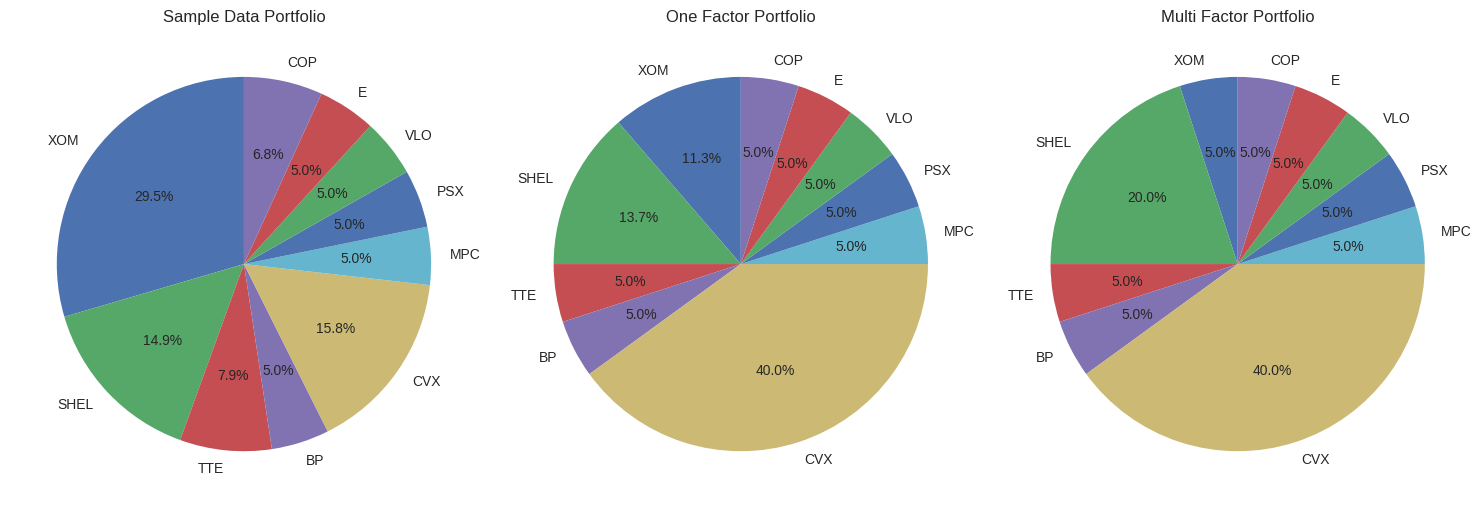

In [169]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Define data
labels = Weight.index.tolist()[:-3]  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from labels
sample_data_weights = optimized_weights_sample_data  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
one_factor_weights = optimized_weights_one_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights
multi_factor_weights = optimized_weights_multi_factor  # Exclude 'Er-Ef', 'Sigma', 'Sharpe Ratio' from weights

# Create pie chart
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Sample Data portfolio
ax[0].pie(sample_data_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Sample Data Portfolio')

# One Factor portfolio
ax[1].pie(one_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title('One Factor Portfolio')

# Multi Factor portfolio
ax[2].pie(multi_factor_weights, labels=labels, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Multi Factor Portfolio')

plt.tight_layout()
plt.show()